# Continuous Control
---
## 1. Start the Environment

In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
env = UnityEnvironment(file_name='/home/yao/Udacity Deep Reinforcement Learning/deep-reinforcement-learning/p2_continuous-control/Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 2. Examine the State and Action Spaces

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))


Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33


## 3. Watch Untrained Agents in the Environment

In [5]:
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations
scores = np.zeros(num_agents)
for t in range(1,100):
    actions = np.random.randn(num_agents,action_size)
    actions = np.clip(actions,-1,1)
    env_info = env.step(actions)[brain_name]
    next_states = env_info.vector_observations
    rewards = env_info.rewards
    dones = env_info.local_done
    scores += env_info.rewards
    states = next_states
    if np.any(dones):
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))


## 4. Train the Agent with DDPG

In [6]:
from ddpg_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import torch
import numpy as np

In [7]:
def ddpg(n_episodes=1500, max_t=1000, print_every=100):
    agent = Agent(state_size=state_size,action_size=action_size,random_seed=1)
    scores_deque = deque(maxlen=print_every)
    scores_all = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            
            
            agent.step(state,action,reward,next_state,done)
            state = next_state
            score += reward
            if done:
                break
        scores_deque.append(score)
        scores_all.append(score)
        print('\rEpisode {}\tAverage Score: {:2f}'.format(i_episode, np.mean(scores_deque)),end='')
        torch.save(agent.actor_local.state_dict(),'checkpoint_actor2.pth')
        torch.save(agent.critic_local.state_dict(),'checkpoint_critic2.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque) >= 30.0:
            print('\rEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(),'checkpoint_actor2.pth')
            torch.save(agent.critic_local.state_dict(),'checkpoint_critic2.pth')
            break
    
    return scores_all

scores_all = ddpg()

Episode 100	Average Score: 6.086100
Environment solved in 185 episodes!	Average Score: 30.17


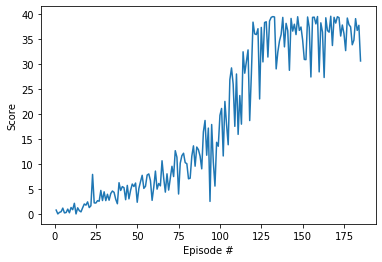

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1,len(scores_all)+1),scores_all)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## 5. Watch a Smart Agent

In [9]:
agent = Agent(state_size=state_size,action_size=action_size,random_seed=1)

agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env.info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations[0]
for t in range(1000):
    action = agent.act(state)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    state = next_state
    if done:
        break
        
env.close()